# Analyzing Text

In [1]:
import requests, re
from bs4 import BeautifulSoup
from collections import Counter
import statistics as stats
import string
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

class TextAnalyzer:
    #magic methos __init__ to create instance of TextAnalyzer class
    def __init__(self, src, src_type='discover'):
        
        #set default variables(self.parameters) that reference instance of the TextAnalyzer class, src parameter sets original and current parameters, src_type specifies type of src argument
        self._orig_content = src
        self._content = src
        self._src_type = src_type
        
        #discover default src_type to discover path, text or url formats, src & src_type set to correct formats
        if src_type == 'discover':
            #compile file and search for (.http), if match found returns values
            urls = re.compile(r'^http')
            match_url = urls.findall(self._content)
            #compile file and search for (.txt), if match found returns values
            tx = re.compile(r'txt$')
            match_tx = tx.findall(src)
            #find_all method, matches and set default src & src_types for class functions
            if match_url:
                src = 'url'
                self._src_type = 'url'
            elif match_tx:
                src = 'path'
                self._src_type = 'path'
            else:
                src = 'text'
                self._src_type = 'text'
                
        elif src_type == 'url':
            urls = re.compile(r'^http')
            match_url = urls.findall(self._content)
            self._src_type = 'url'
            
        elif src_type == 'path':
            tx = re.compile(r'txt$')
            match_tx = tx.findall(src)
            self._src_type = 'path'   
            
        elif src_type == 'text':
            self._src_type = 'text'
            
        else:
            #raise exception if path, text, url not provided#
            raise Exception('Un-supported format, please provide a text, url or path!')

            
    #url parameter, get src text and instantiate beautifulsoup object to parse src url format only
    def discover_url(self):
        rx = requests.get(self._content)
        content = rx.text
        soup = BeautifulSoup(content, 'html')
        #strip out extra tags/html, join all stripped text and return results#
        for text in soup(['style', 'script']):
            text.decompose()
        discover_content = ' '.join(soup.stripped_strings) 
        return discover_content
    
    
    #path parameter, open src txt file path and read file contents, return contents.txt files only
    def discover_path(self):
        with open(self._content, encoding='utf-8') as f:
            discover_content = f.read()
        return discover_content
    
    
    #text parameter, set src text to vairable and return results#   
    def discover_text(self):
        discover_content = self._content
        return discover_content     
    
    
    #function for finding common words from pass in text, key word arguments 
    #values minlen(int) maxlen(int), count(int), casesensitive(boolean)
    def common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        #set src_type parameter to discover text#
        types = self._src_type       
        #find parameter, instantiate appropriate discover object#
        if types == 'text':
            discover_content = self.discover_text()
        elif types == 'url':
            discover_content = self.discover_url()
        elif types == 'path':
            discover_content = self.discover_path()

        if casesensitive == False:
            discover_content = discover_content.upper()   
            
        #regular expression to match string and strip out all non-alphanumeric characters#   
        discover_content = re.sub(r'[\W+]', ' ', discover_content)
                
        #split discover_content strin to iterate through results#
        discover_content = discover_content.split()
        
        #strip puncutaion from string, iterate through discover_content and set keyword arguments#
        common = [word.strip(string.punctuation) for word in discover_content
                  if len(word) > minlen and len(word) < maxlen]
        
        #iterate through strings, instantiate Counter object, find most common values, return 2-element tuple list
        common_words = list(Counter(common).most_common(count))
        return common_words 
    
    #set src type, function accepts url parameter only, keyword arguments, tag(html tag), tag_id(html tag id)#      
    def set_content_to_tag(self, tag, tag_id=None):
        #set src_type parameter
        types = self._src_type       
        #url parameter, get src text string and instantiate beautifulsoup object to parse src url ]
        #format only, find tags are replace with string text#    
        if types == 'url':
            r = requests.get(self._content)
            content = r.text
            soup = BeautifulSoup(content, 'html')
            divs = soup.find([tag, tag_id])
            #set class variable to parsed document results#
            self._content = divs.text 
        else:
            #raise exception if url parameter not passed in#
            raise Exception('No URL detected, provide a valid URL!')
    
    def reset_content(self):  
        #set src_type parameter#
        types = self._src_type
        #url parameter, get src text string from originally loaded class variable, 
        #parse src, set self._content to original class variable        
        if types == 'url':
            content = requests.get(self._orig_content)
            self._content = content.text
        else:
            #raise exception if url parameter not passed in#
            raise Exception('No URL detected, provide a valid URL!')
        
    #Returns a list of 2-element tuples of the format (char, num), where num is the 
    #number of times char shows up in _content. The list should be sorted by num in 
    #descending order. Key word arguments casesensitive(boolean), letters_only(boolean)
    def char_distribution(self, casesensitive=False, letters_only=False):
        #set src_type parameter#
        types = self._src_type
        #find parameter, instantiate appropriate discover object#
        if types == 'text':
            discover_content = self.discover_text()
        elif types == 'url':
            discover_content = self.discover_url()
        elif types == 'path':
            discover_content = self.discover_path()
        #remove all non-alphanumeric from discover_content
        discover_content = re.sub(r'\W+', '', discover_content)
        
        #keyword arguments boolean values
        if letters_only == True:
            #remove all non-alphanumeric, digets from discover_content
            discover_content = re.sub(r'\W+|\d+', '', discover_content)  
            
            #set case for discover_content, boolean values
        if casesensitive == False:
            discover_content = discover_content.upper()
  
        char_word = [word.strip(string.punctuation)for word in discover_content] #iterate through discover_content, strip punctuation
        char_distribution = list((Counter(char_word).most_common())) # make list that returns 2-element tuple
        return  char_distribution

    #return avearage word length of content text analyzer property 
    @property 
    def avg_word_length(self):
        types = self._src_type
        #discover what type and instantiate object
        if types == 'text':
            discover_content = self.discover_text()
        if types == 'url':
            discover_content = self.discover_url()
        if types == 'path':
            discover_content = self.discover_path()
            
        discover_content = discover_content.split()
        words = [word.strip(string.punctuation) for word in discover_content]  #iterate through discover_content, strip punctuation
        
        avg = sum(map(len, words))/len(words) # find average length of word
        avg_round = round(avg, 2) #find average and rounded to 100th place
        return avg_round 
    
    #return word count in content 
    @property 
    def word_count(self):
        types = self._src_type
        #discover what type and instantiate object
        if types == 'text':
            discover_content = self.discover_text()
        elif types == 'url':
            discover_content = self.discover_url()
        elif types == 'path':
            discover_content = self.discover_path()
            discover_content = re.sub(r'[\W+]', ' ', discover_content)#strip out all non-alphanumeric characters of content 

        discover_content = discover_content.split()        
        words = [word.strip(string.punctuation) for word in discover_content] #iterate through content, strip punctuation
        count = len(words) #find length/number of words in content
        return count 
    
    #return all words in content, keyword argument casesensitive
    def _words(self, casesensitive=False):
        types = self._src_type
        #discover what type and instantiate object
        if types == 'text':
            discover_content = self.discover_text()
        elif types == 'url':
            discover_content = self.discover_url()
        elif types == 'path':
            discover_content = self.discover_path()
        #set case for discover_content, boolean values
        if casesensitive == False:
            discover_content = discover_content.upper()
            
        discover_content = re.sub(r'\W+|\d+', ' ', discover_content)#strip out all non-alphanumeric and digits from content

        discover_content = discover_content.split()  
        
        words = [word.strip(string.punctuation) for word in discover_content]#iterate through content, strip puncuation
        return words 
    
    #return all words in content, textanalyzer property
    @property 
    def words(self):
        types = self._src_type
        #discover what type and instantiate object        
        if types == 'text':
            discover_content = self.discover_text()
        elif types == 'url':
            discover_content = self.discover_url()
        elif types == 'path':
            discover_content = self.discover_path()
        
        words = [word.strip(string.punctuation) for word in discover_content.upper().split()] #iterate through content
        return words 

    #positivity score 
    @property
    def positivity(self):
        words = self.words #get all words from conent and set to variable
        word_count = self.word_count #get word count from content and set variable 
        tally = 0 #zero out counter
    
        self._content = 'positive.txt' #set text file name
        content_pos = self.discover_path() #instantiate object
        text_lines_pos = content_pos.split()
                        
        self._content = 'negative.txt' #set text file name
        content_neg = self.discover_path() #instantiate object
        text_lines_neg = content_neg.split()
        #find all matches in negative.txt file and de-increment counter
        for w in words:
            for z in text_lines_neg:
                if w == z:
                    tally = tally - 1
                    
        #find all matches in positive.txt file and increment counter                
        for x in words:
             for y in text_lines_pos:
                    if x == y:
                        tally = tally + 1
                    
        total = round(tally/word_count * 1000) #formula to calculate score 
        return total
    
    #returns number of all disctinct words in content
    @property 
    def distinct_word_count(self):
        types = self._src_type
        
        if types == 'text':
            discover_content = self.discover_text()
        elif types == 'url':
            discover_content = self.discover_url()
        elif types == 'path':
            discover_content = self.discover_path()
      
        words = [word.strip(string.punctuation) for word in discover_content.casefold().split()]
     
        d_word_count = len(Counter(words))
        return d_word_count
    
    #returns all common words 
    def plot_common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        types = self._src_type       
        
        if types == 'text':
            discover_content = self.discover_text()
        elif types == 'url':
            discover_content = self.discover_url()
        elif types == 'path':
            discover_content = self.discover_path()

        if casesensitive == False:
            discover_content = discover_content.upper()    
            
        discover_content = re.sub(r'[\W+]', ' ', discover_content)
        discover_content = discover_content.split()

        common = [word.strip(string.punctuation) for word in discover_content if len(word) > minlen and len(word) < maxlen]
        
        plot_common_words = list(Counter(common).most_common(10))  
        return plot_common_words

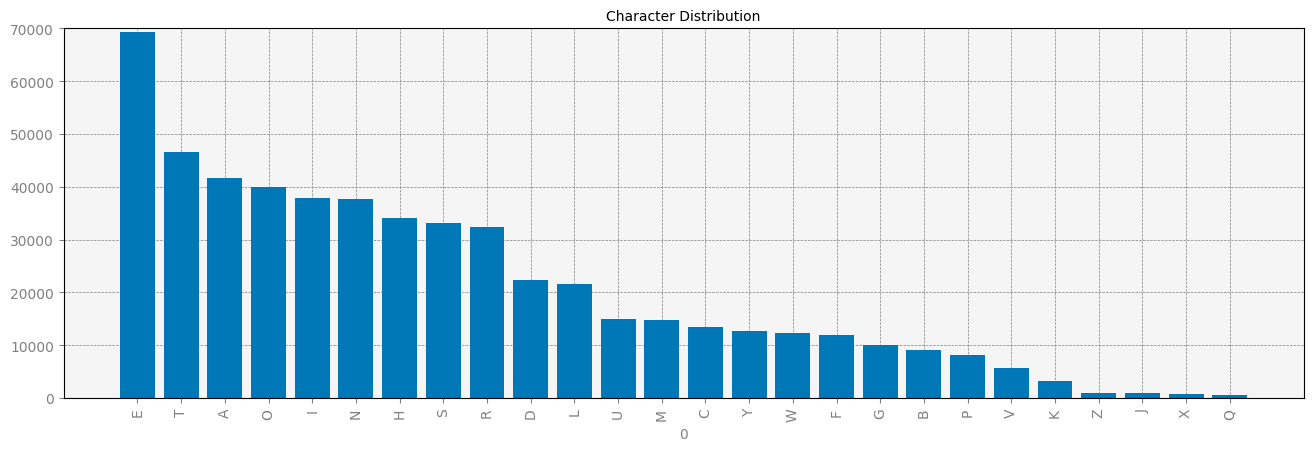

In [23]:
ta = TextAnalyzer(path, src_type='discover') #create TextAnalyzer object
char_dist = ta.char_distribution(letters_only=True) #set property, return characters boolean value

words = [word  for word, i  in char_dist] #find words
num = [i for word, i  in char_dist] #find number

x = np.array(words) #set x plot words
y = np.array(num) #set y plot with numbers
plt.figure().set_figwidth(16) #set width of plot 

ax = plt.axes() #set text on x and y axis
ax.set_xlabel("0", fontsize='10', color='grey') #floating 0
ax.tick_params(axis='x', colors='grey') #set color of text
ax.tick_params(axis='y', colors='grey') #set color of text
ax.set_facecolor("#F5F5F5")

plt.title("Character Distribution", fontsize ='10') #title of plot
plt.ylim(0, 70000) #set upper y limit of plot
plt.bar(x,y, color='#0077b6',  zorder=2) #set plot bar x/y color and border size
plt.xticks(rotation=90) #rotate words on plot
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5) #set lines for plot

(0.0, 700.0)

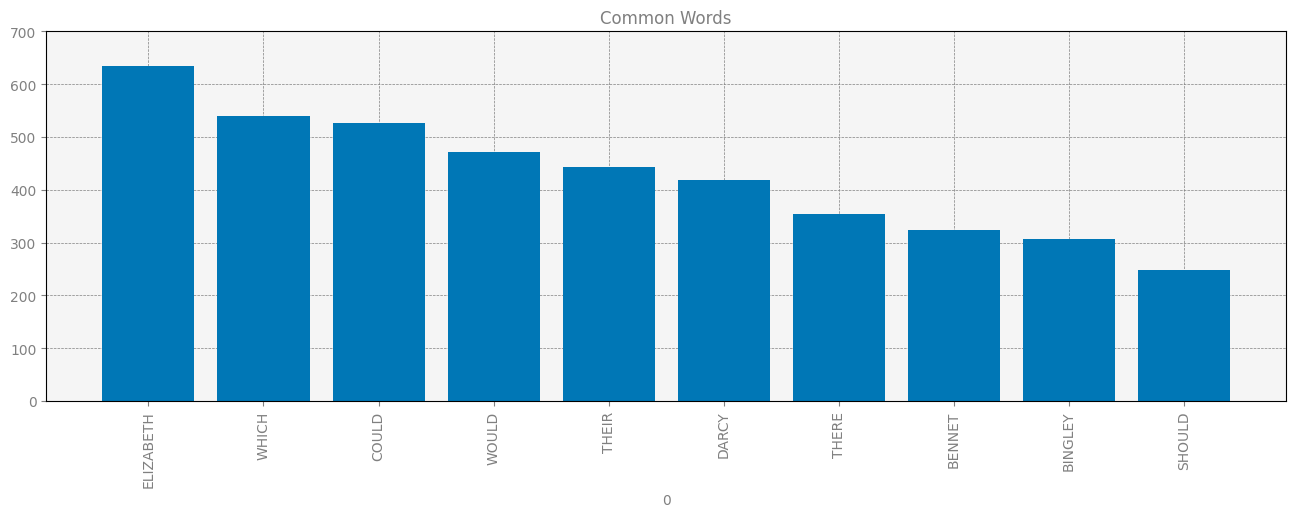

In [22]:
ta = TextAnalyzer(path, src_type='path') #create text analyzer object
common_words = ta.plot_common_words(minlen=4, maxlen=11) #get common words from content
words = [word  for word, i  in common_words] # get all words
num = [i for word, i  in common_words] #get numbers

x = np.array(words)#graph words
y = np.array(num)#graph numbers

plt.figure().set_figwidth(16)  #set width of plot  

ax = plt.axes()  #set text on x and y axis
ax.set_xlabel("0", fontsize='10', color='grey')  #floating 0
ax.tick_params(axis='x', colors='grey') #set color of text
ax.tick_params(axis='y', colors='grey') #set color of text
ax.set_facecolor("#F5F5F5") #face color of text
plt.title("Common Words", fontsize ='12', color = 'gray') #title of plot
plt.bar(x,y, color='#0077b6',  zorder=2) #create bars for plot
plt.xticks(rotation=90) #rotate words on plot
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5) #set plot lines
plt.ylim(0, 700) #set upper limit for y 


In [5]:
help(TextAnalyzer)

Help on class TextAnalyzer in module __main__:

class TextAnalyzer(builtins.object)
 |  TextAnalyzer(src, src_type='discover')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, src, src_type='discover')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  char_distribution(self, casesensitive=False, letters_only=False)
 |      #Returns a list of 2-element tuples of the format (char, num), where num is the 
 |      #number of times char shows up in _content. The list should be sorted by num in 
 |      #descending order. Key word arguments casesensitive(boolean), letters_only(boolean)
 |  
 |  common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False)
 |      #function for finding common words from pass in text, key word arguments 
 |      #values minlen(int) maxlen(int), count(int), casesensitive(boolean)
 |  
 |  discover_path(self)
 |      #path parameter, open src txt file path and read file contents, return contents.txt files only
 |  
 